# simple linear regression

In [69]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import statsmodels.api as sm  # For OLS Regression

In [70]:
# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)
np.random.seed(42)  # Ensuring reproducibility of random noise
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)
true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values

In [71]:
#step:3
# Adding some random noise to salaries to reduce accuracy
noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
Y = true_salaries + noise  # Final dependent variable with noise

In [72]:
# Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)
degree = 2  # You can change this for higher degrees
poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer
X_poly = poly.fit_transform(X)  # Transforming X to polynomial features

In [ ]:
# Step 4: Creating a Linear Regression Model
model = LinearRegression()
# Step 4: Training the model using data set
model.fit(X,Y)

In [10]:
# Step 5: Get the values of slope and intercept from the trained model
print("Slope (m):", model.coef_[0])  # m value
print("Intercept (c):", model.intercept_)  # c value

Slope (m): 4.965498141580591
Intercept (c): 27.430065779800536


Equation of line Y = 4.97X + 27.43


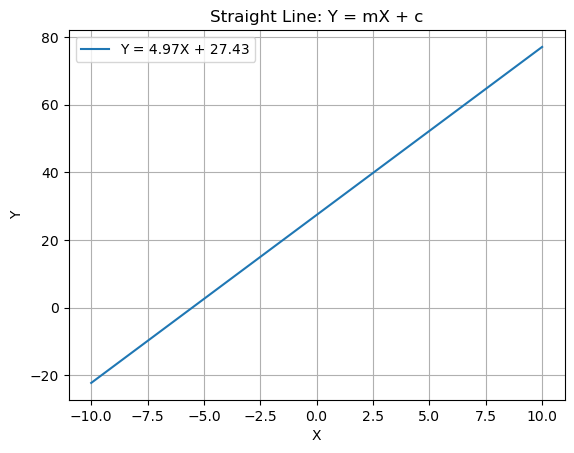

In [20]:
# Step 6: Display the equation of the line
print(f"Equation of line Y = {m:.2f}X + {c:.2f}")
plt.plot(X, Y, label=f'Y = {m:.2f}X + {c:.2f}')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Straight Line: Y = mX + c')
plt.legend()
plt.grid(True)

In [27]:
#step-6 : predict the values using model
# Reshape X to be a 2D array with one feature per sample
X_reshaped = X.reshape(-1, 1)

# Now you can make predictions with the reshaped input
Y_pred = model.predict(X_reshaped)

# Print predictions
print(Y_pred)

[-22.22491564 -21.2217847  -20.21865376 -19.21552282 -18.21239189
 -17.20926095 -16.20613001 -15.20299907 -14.19986813 -13.1967372
 -12.19360626 -11.19047532 -10.18734438  -9.18421345  -8.18108251
  -7.17795157  -6.17482063  -5.1716897   -4.16855876  -3.16542782
  -2.16229688  -1.15916594  -0.15603501   0.84709593   1.85022687
   2.85335781   3.85648874   4.85961968   5.86275062   6.86588156
   7.86901249   8.87214343   9.87527437  10.87840531  11.88153625
  12.88466718  13.88779812  14.89092906  15.89406     16.89719093
  17.90032187  18.90345281  19.90658375  20.90971468  21.91284562
  22.91597656  23.9191075   24.92223844  25.92536937  26.92850031
  27.93163125  28.93476219  29.93789312  30.94102406  31.944155
  32.94728594  33.95041687  34.95354781  35.95667875  36.95980969
  37.96294063  38.96607156  39.9692025   40.97233344  41.97546438
  42.97859531  43.98172625  44.98485719  45.98798813  46.99111906
  47.99425     48.99738094  50.00051188  51.00364282  52.00677375
  53.00990469

# Model evalution matrix 

In [28]:
# Step 7: Predit values using the model
#Mean square error
mse = mean_squared_error(Y,Y_pred)
print(f"Mean Squared Error(MSE):{mse:.2f}")

Mean Squared Error(MSE):0.00


In [30]:
#Mean Absolute Error
mae = mean_absolute_error(Y,Y_pred)
print(f"Mean Absolute Error(MAE):{mae:.2f}")

Mean Absolute Error(MAE):0.00


In [31]:
print("True values:", Y[:5])  # Print first 5 true values
print("Predicted values:", Y_pred[:5])  # Print first 5 predicted values


True values: [-22.22491564 -21.2217847  -20.21865376 -19.21552282 -18.21239189]
Predicted values: [-22.22491564 -21.2217847  -20.21865376 -19.21552282 -18.21239189]


In [32]:
#If all squared differences are 0, it confirms that the predicted and true values are the same
print("Squared differences:", (Y - Y_pred) ** 2)

Squared differences: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [33]:
#Root Mean Square Error
rsme = np.sqrt(mse)
print(f" Root Mean Squared Error(RSME):{rsme:.2f}")

 Root Mean Squared Error(RSME):0.00


In [36]:
#R-Square - To calculate the accuracy of the model-Represents how well the model fits the data(0 to 1,where 1 is best)  
r2 = r2_score(Y,Y_pred)
print(f" R-Squared (R^2):{r2:.2f}")

 R-Squared (R^2):1.00


In [38]:
#Adjusted R-squared(R^2_adj)-Adjusted for the number of predictors,better for multiple regression
n=len(Y)#Number of observations
p=1#Number of independent variables(Experience)
adj_r2=1-((1-r2)*(n-1)/(n-p-1))
print(f" Adjusted R-Squared (R^2):{adj_r2:.2f}")

 Adjusted R-Squared (R^2):1.00


In [73]:
# 6. Ordinary Least Squares (OLS) Summary - Gives detailed statistical summary of the regression
X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression
ols_model = sm.OLS(Y, X_ols).fit()  # Fit OLS model
print("\nOLS Regression Summary:\n")
print(ols_model.summary())  # Display detailed statistical summary


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.50e-05
Time:                        12:09:40   Log-Likelihood:                -26.390
No. Observations:                  10   AIC:                             58.78
Df Residuals:                       7   BIC:                             59.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8348     

C:\Users\CVR\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


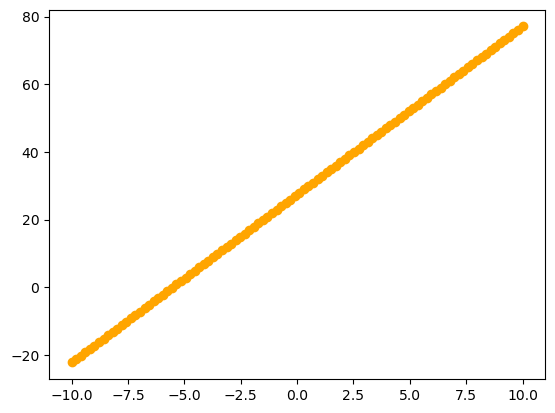

In [48]:
plt.scatter(X,Y,color='orange',label='Actual data')
plt.show()

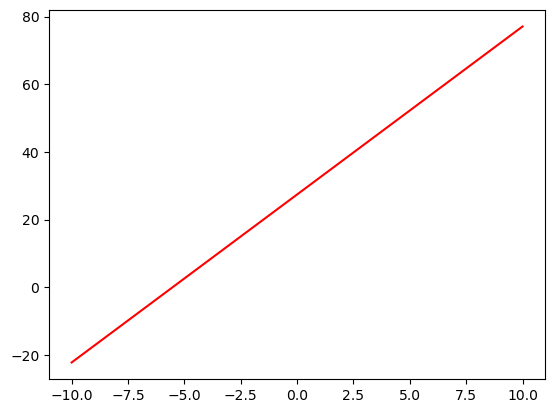

In [49]:
plt.plot(X,Y_pred,color='red',label='Best Fit Line')

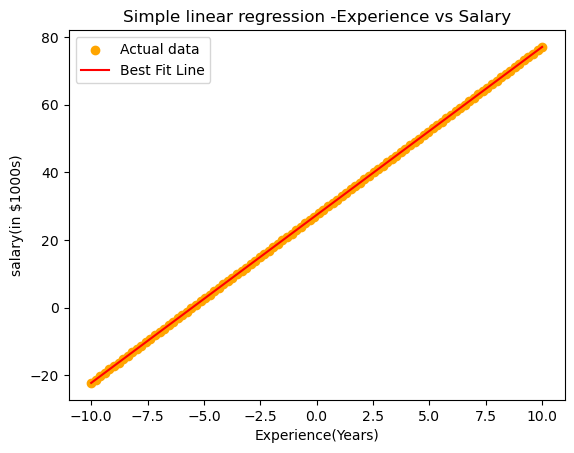

In [50]:
# Step 8: Plot the regression line
plt.scatter(X,Y,color='orange',label='Actual data')
plt.plot(X,Y_pred,color='red',label='Best Fit Line')
plt.xlabel('Experience(Years)')
plt.ylabel('salary(in $1000s)')
plt.title('Simple linear regression -Experience vs Salary')
plt.legend()
plt.show()

# prediction feature

In [66]:
#step 9: Prediction Features
while True: 
    try: 
        exp = float(input("\nEnter years of experience predict salary (or -1 to exit): "))
        if exp == -1:
            break # Exit the Loop 
        predicted_salary = model.predict(np.array[[exp]])[0]
        print("Predicted Salary for {exp} years of experience: ${predicted salary: .2f}K") 
    except ValueError: 
            print("Please enter a valid number!") 

KeyboardInterrupt: Interrupted by user